In [1]:
import re
import pandas as pd
import numpy as np


In [2]:
fh=open('isear.txt')
label=[]
sen=[]
for line in fh:
    lis=re.findall('[a-zA-Z]+',line)
    label.append(lis[0])
    sen.append(' '.join(lis[1:]))
  

In [3]:
print(label)

['ID', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger', 'sadness'

In [4]:
print(sen)

['CITY COUN SUBJ SEX AGE RELI PRAC FOCC MOCC FIEL EMOT WHEN LONG INTS ERGO TROPHO TEMPER EXPRES MOVE EXP EXP EXP PARAL CON EXPC PLEA PLAN FAIR CAUS COPING MORL SELF RELA VERBAL NEUTRO Field Field Field MYKEY SIT STATE', 'During the period of falling in love each time that we met and especially when we had not met for a long time', 'When I was involved in a traffic accident', 'When I was driving home after several days of hard work there was a motorist ahead of me who was driving at km hour and refused despite his low speeed to let me overtake', 'When I lost the person who meant the most to me', 'The time I knocked a deer down the sight of the animal s injuries and helplessness The realization that the animal was so badly hurt that it had to be put down and when the animal screamed at the moment of death', 'When I did not speak the truth', 'When I caused problems for somebody because he could not keep the appointed time and this led to various consequences', 'When I got a letter offerin

In [5]:
import csv


In [6]:
with open ('data2.csv','w') as f:
    writer=csv.writer(f)
    writer.writerows(zip(label,sen))

In [7]:
df=pd.read_csv('data2.csv')

In [8]:
df.head()

,ID,CITY COUN SUBJ SEX AGE RELI PRAC FOCC MOCC FIEL EMOT WHEN LONG INTS ERGO TROPHO TEMPER EXPRES MOVE EXP EXP EXP PARAL CON EXPC PLEA PLAN FAIR CAUS COPING MORL SELF RELA VERBAL NEUTRO Field Field Field MYKEY SIT STATE
0,joy,During the period of falling in love each time...
1,fear,When I was involved in a traffic accident
2,anger,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me
4,disgust,The time I knocked a deer down the sight of th...


In [9]:
df.rename(columns={'ID':'label','CITY COUN SUBJ SEX AGE RELI PRAC FOCC MOCC FIEL EMOT WHEN LONG INTS ERGO TROPHO TEMPER EXPRES MOVE EXP EXP EXP PARAL CON EXPC PLEA PLAN FAIR CAUS COPING MORL SELF RELA VERBAL NEUTRO Field Field Field MYKEY SIT STATE':'sentence'},inplace=True)

In [10]:
df.head()

,label,sentence
0,joy,During the period of falling in love each time...
1,fear,When I was involved in a traffic accident
2,anger,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me
4,disgust,The time I knocked a deer down the sight of th...


In [11]:
df.isnull().sum()

label       0
sentence    0
dtype: int64

In [12]:
'''
Not using NLTK as Spacy is more faster and accurate in Lemmatization and removing stop words.
corpus=[]
for i in range(7666):
    sentence=re.sub('[^a-zA-Z]', ' ',df['sentence'][i])
    sentence=sentence.lower()
    setence=sentence.split()
    ws=WordLemmatizer()
    sentence=[ws.lemmatize(s) for s in sentence if not s in stopwords.words('english')]
    sentence=' '.join(sentence)
    corpus.append(sentence)'''

"\nNot using NLTK as Spacy is more faster and accurate in Lemmatization and removing stop words.\ncorpus=[]\nfor i in range(7666):\n    sentence=re.sub('[^a-zA-Z]', ' ',df['sentence'][i])\n    sentence=sentence.lower()\n    setence=sentence.split()\n    ws=WordLemmatizer()\n    sentence=[ws.lemmatize(s) for s in sentence if not s in stopwords.words('english')]\n    sentence=' '.join(sentence)\n    corpus.append(sentence)"

In [13]:

import spacy
nlp=spacy.load('en_core_web_sm')


In [14]:
print(nlp.Defaults.stop_words)

{'may', "'ll", 'most', 'thereby', 'off', 'until', 'say', 'amount', 'out', 'there', '‘s', 'only', 'back', 'herself', 'with', 'himself', 'without', 'also', 'own', '‘m', 'become', 'nevertheless', 'someone', 'two', 'herein', 'hundred', 'somehow', 'on', 'beyond', 'get', '‘ve', 'formerly', 'anyway', 'side', 'keep', "'d", 'nine', 'seems', 'beforehand', 'is', 'others', 'by', 'should', 'hers', 'the', 'where', 'front', 'through', 'rather', 'since', 'fifty', '‘d', 'quite', 'was', 'latterly', '’ll', 'unless', 'whereafter', "'m", 'moreover', 'both', 'whom', 'such', 'take', 'beside', '‘re', 'thereafter', 'mine', 'its', 'yours', 'no', 'done', 'been', 'put', 'what', 'ours', 'yet', 'yourself', 'give', 'call', 'twelve', 'her', 'next', 'whose', 'were', 'nothing', 'using', 'meanwhile', 'other', 'much', 'your', 'seeming', 'whence', 'throughout', 'those', 'toward', 'for', 'behind', 'anywhere', 'due', 'whatever', 'more', 'although', 'perhaps', 'hereupon', 'another', 'became', 'latter', 'really', 'a', 'last',

In [15]:
# Removing stop words
corpus=[]
for i in range(7666):
    sentence=re.sub('[^a-zA-Z]', ' ',df['sentence'][i])
    sentence=sentence.lower()
    sentence=sentence.split()
    
    sentence=[s for s in sentence if not nlp.vocab[s].is_stop]
    sentence=' '.join(sentence)
    corpus.append(sentence)

In [16]:
corpus

['period falling love time met especially met long time',
 'involved traffic accident',
 'driving home days hard work motorist ahead driving km hour refused despite low speeed let overtake',
 'lost person meant',
 'time knocked deer sight animal s injuries helplessness realization animal badly hurt animal screamed moment death',
 'speak truth',
 'caused problems somebody appointed time led consequences',
 'got letter offering summer job applied',
 'going home night paris man came asked afraid late night',
 'talking party time long friend came interrupted left',
 'friends ask new year s party',
 'saw drunk kids years old town walpurgis night',
 'remember presentation task accounts meeting',
 'uncle neighbour came home police escort',
 'days feel close partner friends feel peace experience close contact people regard greatly',
 'time imagine love contact illness death',
 'obviously unjustly treated possibility elucidating',
 'think short time live relate periods life think use short time

In [17]:
#Lemmatization
corpus2=[]
for i in range(7666):
    sent=nlp(corpus[i])
    
    sent2=[s.lemma_ for s in sent ]
    sentence2=' '.join(sent2)
    corpus2.append(sentence2)

In [18]:
corpus2

['period fall love time meet especially meet long time',
 'involved traffic accident',
 'drive home day hard work motorist ahead drive km hour refuse despite low speeed let overtake',
 'lose person mean',
 'time knock deer sight animal s injuries helplessness realization animal badly hurt animal scream moment death',
 'speak truth',
 'cause problem somebody appoint time lead consequence',
 'get letter offer summer job apply',
 'go home night paris man come ask afraid late night',
 'talk party time long friend come interrupted leave',
 'friend ask new year s party',
 'see drunk kid year old town walpurgis night',
 'remember presentation task account meeting',
 'uncle neighbour come home police escort',
 'day feel close partner friend feel peace experience close contact people regard greatly',
 'time imagine love contact illness death',
 'obviously unjustly treat possibility elucidating',
 'think short time live relate period life think use short time',
 'gathering find involuntarily sit

In [19]:
df.head()

,label,sentence
0,joy,During the period of falling in love each time...
1,fear,When I was involved in a traffic accident
2,anger,When I was driving home after several days of ...
3,sadness,When I lost the person who meant the most to me
4,disgust,The time I knocked a deer down the sight of th...


In [20]:
df['cleaned_sentence']=corpus2

In [21]:
df.head()

,label,sentence,cleaned_sentence
0,joy,During the period of falling in love each time...,period fall love time meet especially meet lon...
1,fear,When I was involved in a traffic accident,involved traffic accident
2,anger,When I was driving home after several days of ...,drive home day hard work motorist ahead drive ...
3,sadness,When I lost the person who meant the most to me,lose person mean
4,disgust,The time I knocked a deer down the sight of th...,time knock deer sight animal s injuries helple...


In [22]:
df.label.value_counts()

sadness    1096
disgust    1096
anger      1096
shame      1096
fear       1095
joy        1094
guilt      1093
Name: label, dtype: int64

In [23]:
#WordCloud Analysis

In [24]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.cm
import matplotlib.pyplot as plt

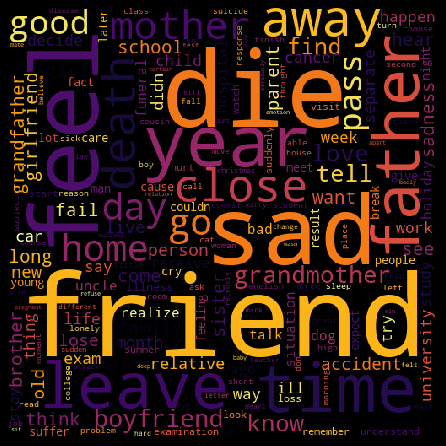

In [25]:
depressive_words = ' '.join(list(df[df['label'] == 'sadness']['cleaned_sentence']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap=matplotlib.cm.inferno).generate(depressive_words)
plt.figure(figsize = (8, 6), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

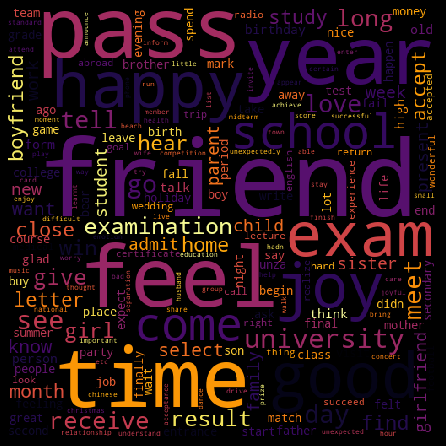

In [26]:
depressive_words = ' '.join(list(df[df['label'] == 'joy']['cleaned_sentence']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap=matplotlib.cm.inferno).generate(depressive_words)
plt.figure(figsize = (8, 6), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [27]:
df['emotion'] = df['label'].apply(lambda c: 'Positive' if c =='sadness' else 'Negative')

In [28]:
df['emotion'].value_counts()

Negative    6570
Positive    1096
Name: emotion, dtype: int64

In [29]:
df5=pd.read_csv('sentiment_tweets3.csv')

In [30]:
df5.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [31]:
df5 = df5.drop(['Unnamed: 0'],axis=1)



In [32]:
df5.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [33]:
df5

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [34]:
df5=df5.iloc[6000:]

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 6000 to 10313
Data columns (total 2 columns):
message    4314 non-null object
label      4314 non-null int64
dtypes: int64(1), object(1)
memory usage: 67.5+ KB


In [36]:
corpus=[]
for i in range(6000,10314):
    sentence=re.sub('[^a-zA-Z]', ' ',df5['message'][i])
    sentence=sentence.lower()
    sentence=sentence.split()
    
    sentence=[s for s in sentence if not nlp.vocab[s].is_stop]
    sentence=' '.join(sentence)
    corpus.append(sentence)

In [37]:
corpus2=[]
for i in corpus:
    sent=nlp(i)   
    sent2=[s.lemma_ for s in sent ]
    sentence2=' '.join(sent2)
    corpus2.append(sentence2)

In [38]:
len(corpus2)

4314

In [39]:
df5['cleaned_sentence']=corpus2

/home/bansuri0100/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df5=df5[['label','message','cleaned_sentence']]

In [41]:
df5.head()

,label,message,cleaned_sentence
6000,0,@Spoonsie LÃ¢che pas la patate ma belle! I wi...,spoonsie l che pas la patate ma belle cheering
6001,0,@MsNabilalah Aww! you're welcome!,msnabilalah aww welcome
6002,0,@Wossy Does this mean that you will only be ab...,wossy mean able fly circle
6003,0,k fest 2moro!!! can't wait 2 c 3OH!3!!! oh nd ...,k fest moro t wait c oh oh nd free ice cream f...
6004,0,"@cuelight thanks, but nope, not my birthday, m...",cuelight thank nope birthday mine end july wis...


In [42]:
df.head()

,label,sentence,cleaned_sentence,emotion
0,joy,During the period of falling in love each time...,period fall love time meet especially meet lon...,Negative
1,fear,When I was involved in a traffic accident,involved traffic accident,Negative
2,anger,When I was driving home after several days of ...,drive home day hard work motorist ahead drive ...,Negative
3,sadness,When I lost the person who meant the most to me,lose person mean,Positive
4,disgust,The time I knocked a deer down the sight of th...,time knock deer sight animal s injuries helple...,Negative


In [43]:
df5.rename(columns={'message':'sentence'},inplace=True)

In [44]:
df3=df5[df5['label']>=0]

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4314 entries, 6000 to 10313
Data columns (total 3 columns):
label               4314 non-null int64
sentence            4314 non-null object
cleaned_sentence    4314 non-null object
dtypes: int64(1), object(2)
memory usage: 134.8+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 4 columns):
label               7666 non-null object
sentence            7666 non-null object
cleaned_sentence    7666 non-null object
emotion             7666 non-null object
dtypes: object(4)
memory usage: 239.7+ KB


In [47]:
df4=df.append(df3)

/home/bansuri0100/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [48]:
df4.head()

,cleaned_sentence,emotion,label,sentence
0,period fall love time meet especially meet lon...,Negative,joy,During the period of falling in love each time...
1,involved traffic accident,Negative,fear,When I was involved in a traffic accident
2,drive home day hard work motorist ahead drive ...,Negative,anger,When I was driving home after several days of ...
3,lose person mean,Positive,sadness,When I lost the person who meant the most to me
4,time knock deer sight animal s injuries helple...,Negative,disgust,The time I knocked a deer down the sight of th...


In [49]:
df4['emotion'] = df4['label'].apply(lambda c: 'Positive' if c !=0 and c!='joy' else 'Negative')

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 10313
Data columns (total 4 columns):
cleaned_sentence    11980 non-null object
emotion             11980 non-null object
label               11980 non-null object
sentence            11980 non-null object
dtypes: object(4)
memory usage: 468.0+ KB


In [51]:
df4['emotion'].value_counts()

Positive    8886
Negative    3094
Name: emotion, dtype: int64

In [52]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 10313
Data columns (total 4 columns):
cleaned_sentence    11980 non-null object
emotion             11980 non-null object
label               11980 non-null object
sentence            11980 non-null object
dtypes: object(4)
memory usage: 468.0+ KB


In [53]:
df4.to_csv('cleaned_data.csv')

In [54]:
from sklearn.model_selection import train_test_split



X = df4['cleaned_sentence']
y = df4['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [56]:
def process(str):
    corpus=[]
    
    sentence=re.sub('[^a-zA-Z]', ' ',str)
    sentence=sentence.lower()
    sentence=sentence.split()
    
    sentence=[s for s in sentence if not nlp.vocab[s].is_stop]
    sentence=' '.join(sentence)
    
    
    
    sent=nlp(sentence)   
    sent2=[s.lemma_ for s in sent ]
    sentence2=' '.join(sent2)
    return(sentence2)

In [57]:
string=str(input("Enter Message :"))
string2=process(string)   
z=pd.Series(string2)
predictions = text_clf.predict(z)
predictions

Enter Message :hi


array(['Negative'], dtype=object)

In [58]:
predictions2=text_clf.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions2))

[[ 450  157]
 [  83 1706]]


In [59]:
print(metrics.classification_report(y_test,predictions2))

              precision    recall  f1-score   support

    Negative       0.84      0.74      0.79       607
    Positive       0.92      0.95      0.93      1789

    accuracy                           0.90      2396
   macro avg       0.88      0.85      0.86      2396
weighted avg       0.90      0.90      0.90      2396



In [60]:
print(metrics.accuracy_score(y_test,predictions2))

0.8998330550918197


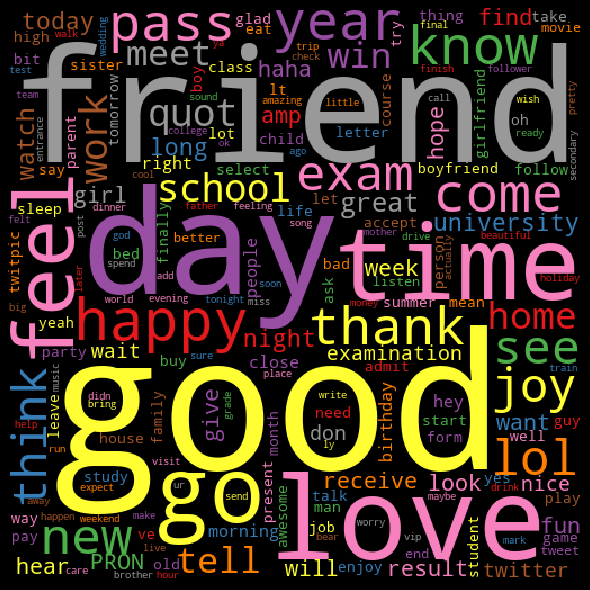

In [62]:
depressive_words = ' '.join(list(df4[df4['emotion'] == 'Negative']['cleaned_sentence']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Set1").generate(depressive_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [63]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/bansuri0100/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
a = 'i feel very bad'

scores=sid.polarity_scores(a)
scores

{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5849}

In [73]:
list=[]
list.append(scores['compound'])

In [74]:
list[0]

-0.5994